## Results

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv as csv
import re

from pathlib import Path
from os import listdir

In [70]:
results_path = Path.cwd() / '../data/output/run-1521497943/results/part-00000'
labels_path = Path.cwd() / '../data/labels.csv'

In [113]:
def get_tuples(genres):
    l = []
    for g in genres:
        m = re.split(''',(?=(?:[^'"]|'[^']*'|"[^"]*")*$)''', g)
        l.append((m[0][1:].replace("(", "\(").replace(")", "\)"), float(m[1][:-1])))
    return l

In [114]:
results = []
p = re.compile('''\((\d+),List\((\(.+?,[0-9.]+\)+(, )?)\)\)''')

with open (results_path) as f:
    for line in f:
        m = p.match(line)
        results.append((int(m.group(1)), 
                        get_tuples(re.split(''', (?=(?:[^'"]|'[^']*'|"[^"]*")*$)''', m.group(2))))) 

In [115]:
label_df = pd.read_csv(labels_path, names = ('id', 'genre'))

In [119]:
accuracy = []

for res in results:
    t = 0
    s = 0
    for l in res[1]:
        if label_df.loc[label_df['id'] == res[0]]['genre'].str.contains(l[0]).any():
            t = t + 1
            s = s + l[1]
    print(res[0], ":", t, "/", len(res[1]))
    print(res[0], ":", s)
    accuracy.append((res[0], s, t*1.0/len(res[1])))

11578 : 2 / 12
11578 : 0.358111396
35140 : 2 / 12
35140 : 0.43255752999999997
35664 : 2 / 13
35664 : 0.148335156
43230 : 3 / 12
43230 : 0.248888815
46074 : 1 / 13
46074 : 0.060619928
25440 : 4 / 13
25440 : 0.49086723099999996
46418 : 2 / 14
46418 : 0.2101355
6134 : 1 / 13
6134 : 0.054301787
3568 : 1 / 15
3568 : 0.05622117
46650 : 3 / 14
46650 : 0.73925147
30074 : 2 / 12
30074 : 0.65025088
35148 : 2 / 12
35148 : 0.46919549
860 : 2 / 14
860 : 0.41491092
42666 : 1 / 14
42666 : 0.14065489
6082 : 2 / 12
6082 : 0.5286093000000001
40680 : 2 / 13
40680 : 0.25479157
16108 : 2 / 11
16108 : 0.30020060000000004
45400 : 1 / 13
45400 : 0.8274423
4784 : 0 / 7
4784 : 0
29326 : 1 / 14
29326 : 0.2355136
40526 : 1 / 10
40526 : 0.07914776
40784 : 2 / 11
40784 : 0.10978750000000001
34840 : 1 / 13
34840 : 0.22711304
32206 : 3 / 15
32206 : 0.569566042
33452 : 2 / 13
33452 : 1.06452114
8462 : 2 / 10
8462 : 0.40941909
24022 : 3 / 9
24022 : 0.41245432
14942 : 1 / 11
14942 : 0.5679325
5814 : 1 / 10
5814 : 0.1408

(array([35., 38., 26., 42., 26.,  7., 12., 10.,  0.,  1.]),
 array([0.        , 0.04545455, 0.09090909, 0.13636364, 0.18181818,
        0.22727273, 0.27272727, 0.31818182, 0.36363636, 0.40909091,
        0.45454545]),
 <a list of 10 Patch objects>)

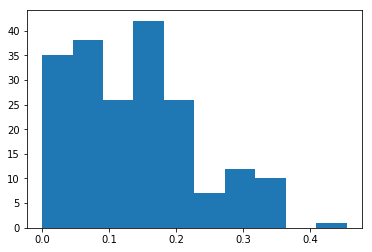

In [128]:
plt.hist([x[2] for x in accuracy])

(array([66., 24., 28., 20., 21., 16., 10.,  5.,  4.,  3.]),
 array([0.        , 0.11329156, 0.22658312, 0.33987467, 0.45316623,
        0.56645779, 0.67974935, 0.79304091, 0.90633246, 1.01962402,
        1.13291558]),
 <a list of 10 Patch objects>)

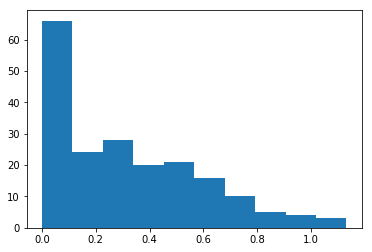

In [127]:
plt.hist([x[1] for x in accuracy])

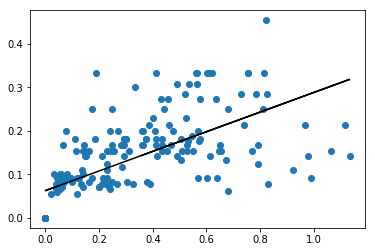

In [136]:
x = [x[1] for x in accuracy]
y = [x[2] for x in accuracy]

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 

plt.plot(x,y, 'o', x, fit_fn(x), '-k')
